Student Name: Yong Hen Tan

Student Number: 22273433

# Task 2
* Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 
Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.

* Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster #needed for k-Means clustering
import seaborn as sns
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE


%matplotlib inline

df = pd.read_csv("./loans_train_prepared-1.csv")
df

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
0      0.000000         1.084523    1.058140             0.750   
1      0.333333         0.925883    1.047319             0.750   
2      0.000000         0.683858    0.635920             0.750   
3      0.000000         0.608992    1.002824             0.750   
4      0.000000         1.101869    1.115650             0.750   
..          ...              ...         ...               ...   
609    0.000000         0.666409    0.676143             0.750   
610    1.000000         0.858916    0.395858             0.375   
611    0.333333         1.313719    1.566110             0.750   
612    0.666667         1.267616    1.325676             0.750   
613    0.000000         0.925883    1.074155             0.750   

     Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
0                 1            1           0            0            0   
1                 1            1           0            1            0   
2                 1            1           0            1            0   
3                 1            1           0            1            0   
4                 1            1           0            0            0   
..              ...          ...         ...          ...          ...   
609               1            0           0            0            0   
610               1            1           0            1            0   
611               1            1           0            1            0   
612               1            1           0            1            0   
613               0            0           0            0            0   

     Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
0                    0                  0                       0   
1                    0                  0                       0   
2                    1                  0                       0   
3                    0                  0                       1   
4                    0                  0                       0   
..                 ...                ...                     ...   
609                  0                  0                       0   
610                  0                  0                       0   
611                  0                  0                       0   
612                  0                  0                       0   
613                  1                  0                       0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                          0                    1              1     0.841086  
1                          0                    0              0     0.871711  
2                          0                    1              1     0.385189  
3                          0                    1              1     0.717012  
4                          0                    1              1     0.860305  
..                       ...                  ...            ...          ...  
609                        0                    0              1     0.364708  
610                        0                    0              1     0.587496  
611                        0                    1              1     1.116075  
612                        0                    1              1     1.042256  
613                        1                    0              0     0.663523  

[614 rows x 16 columns]

In [163]:
df.isna().sum()

Dependents                 0
ApplicantIncome            0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Gender_nan                 0
Married_Yes                0
Married_nan                0
Self_Employed_Yes          0
Self_Employed_nan          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
TotalIncome                0
dtype: int64

In [164]:
df.shape

(614, 16)

In [165]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

c:\Users\henry\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


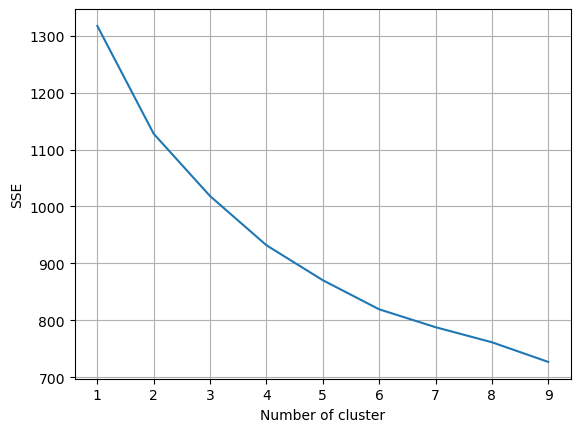

In [166]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center


plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.show()

In [167]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.452279810757832
For n_clusters=3, The Silhouette Coefficient is 0.3555009290942184
For n_clusters=4, The Silhouette Coefficient is 0.36165586194911514
For n_clusters=5, The Silhouette Coefficient is 0.31925202536392433
For n_clusters=6, The Silhouette Coefficient is 0.30287048352875173
For n_clusters=7, The Silhouette Coefficient is 0.30368125394202494
For n_clusters=8, The Silhouette Coefficient is 0.3191190070070102
For n_clusters=9, The Silhouette Coefficient is 0.3333721683143247
For n_clusters=10, The Silhouette Coefficient is 0.3156506316201395


In [168]:
k = 2

clustered_data_sklearn = cluster.KMeans(n_clusters=2, max_iter=300).fit(df)
data_and_centers = np.r_[df,clustered_data_sklearn.cluster_centers_]

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

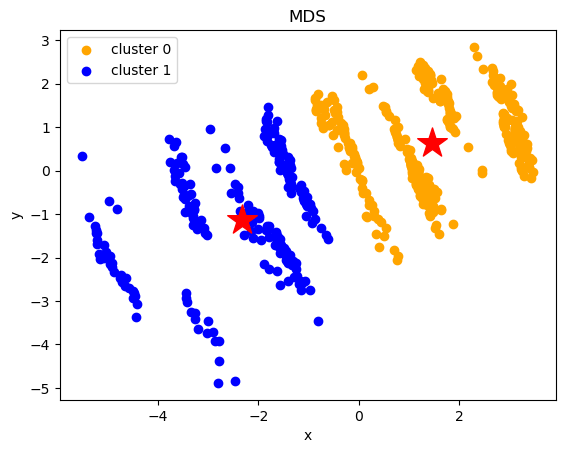

In [169]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [170]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

c:\Users\henry\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\henry\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


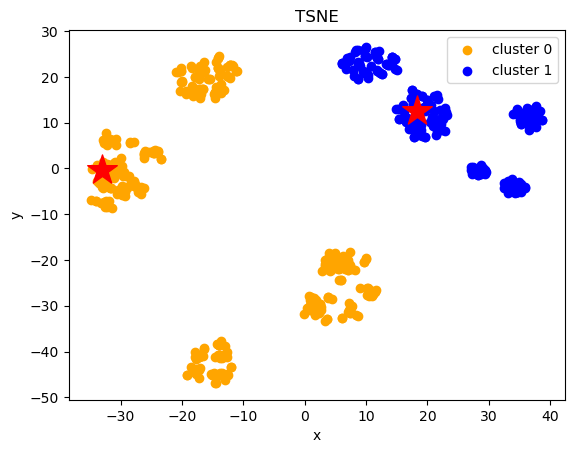

In [171]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [172]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [173]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  clusters  cluster  
0                    1              1     0.841086         1        0  
1                    0              0     0.871711         4        1  
2                    1              1     0.385189         0        0  
3                    1              1     0.717012         0        0  
4                    1              1     0.860305         1        0

In [174]:
df.groupby('cluster').mean()


Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.208772         0.812158    1.004685          0.716842   
1          0.311966         1.086177    1.192394          0.707692   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.960526     0.771053    0.013158     0.610526     0.007895   
1              0.683761     0.837607    0.034188     0.709402     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.105263           0.057895                0.213158   
1                 0.179487           0.042735                0.226496   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.521053             0.265789       0.936842   
1                       0.149573             0.431624       0.282051   

         TotalIncome  clusters  
cluster                         
0           0.750220  1.431579  
1           1.045322  5.405983

# Task 3

* Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.
* Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

## DSCAN Approach with MDS, TSNE, SpectralEmbedding

4


Text(0, 0.5, 'Distance')

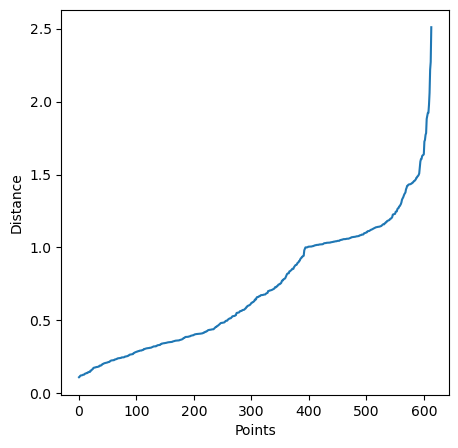

In [175]:
from sklearn.neighbors import NearestNeighbors
import math

k = math.floor(df.shape[1] ** (1/2))

print(k)
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = np.sort(distances[:,k - 1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [176]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5)
dbscan.fit(df)

n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

4

In [177]:
embed = manifold.MDS(n_components=2).fit_transform(df)

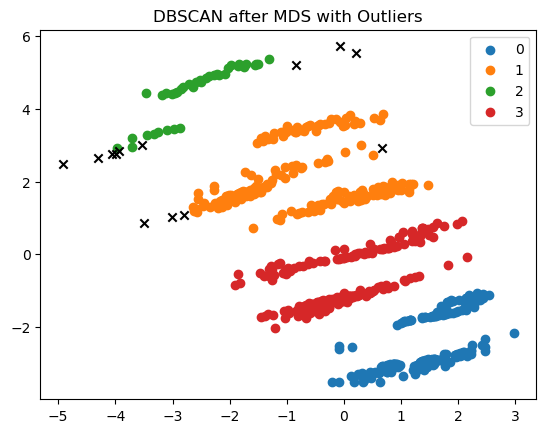

In [178]:
def dbscan_plot(dbscan, points, title):
    noise_indices = np.where(dbscan.labels_ == -1)[0]
    unique_labels = set(dbscan.labels_)
    for label in unique_labels:
        if label == -1:
        # Plot noise points in red
            plt.scatter(points[noise_indices, 0], points[noise_indices, 1], c='black', marker='x')
        else:
        # Plot data points with label from the cluster
            idx = np.where(dbscan.labels_ == label)[0]
            plt.scatter(points[idx, 0], points[idx, 1], label=label)

    plt.title(title)
    plt.legend()

dbscan_plot(dbscan, embed, "DBSCAN after MDS with Outliers")

In [179]:
tsne = manifold.TSNE(n_components=2).fit_transform(df)
print("transformation complete")

c:\Users\henry\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\henry\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


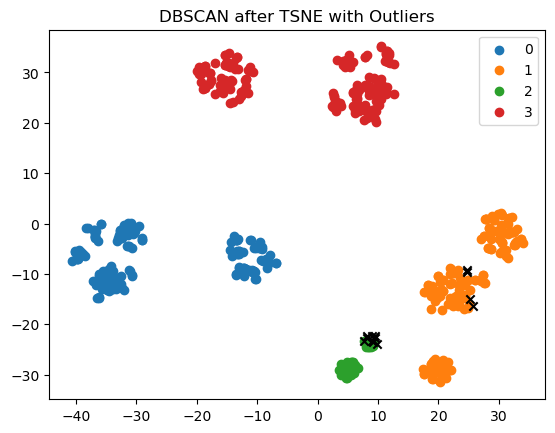

In [180]:
dbscan_plot(dbscan, tsne, "DBSCAN after TSNE with Outliers")

In [181]:
from sklearn.manifold import SpectralEmbedding

spectral_embedded = SpectralEmbedding().fit_transform(df)
spectral_embedded.shape

(614, 2)

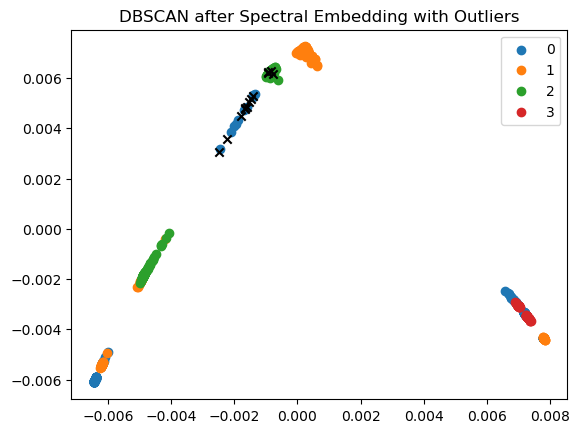

In [161]:
# clustering_scatterplot(spectral_embedded, dbscan.labels_, None, "SpectralEmbedding")
dbscan_plot(dbscan, spectral_embedded, "DBSCAN after Spectral Embedding with Outliers")

## Meanshift with MDS, TSNE, SpectralEmbedding

Num of Clusters =  2


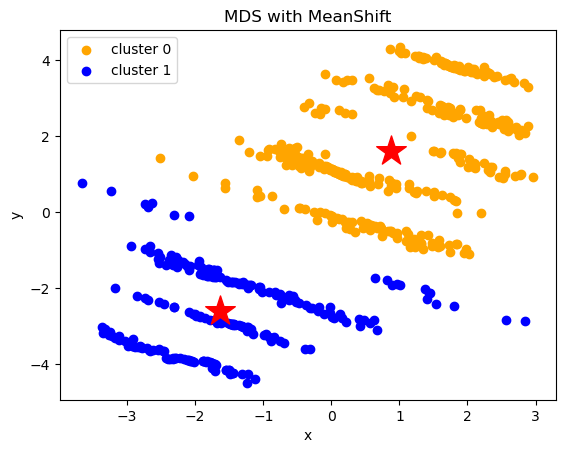

In [71]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift().fit(df)
num_cluster = len(np.unique(mean_shift.labels_))
print("Num of Clusters = ", num_cluster )

data_and_centers = np.r_[df, mean_shift.cluster_centers_]

mds_with_mean_shift = manifold.MDS(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(mds_with_mean_shift[:-num_cluster, :], mean_shift.labels_, mds_with_mean_shift[-num_cluster:,:], "MDS with MeanShift")

c:\Users\henry\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\henry\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


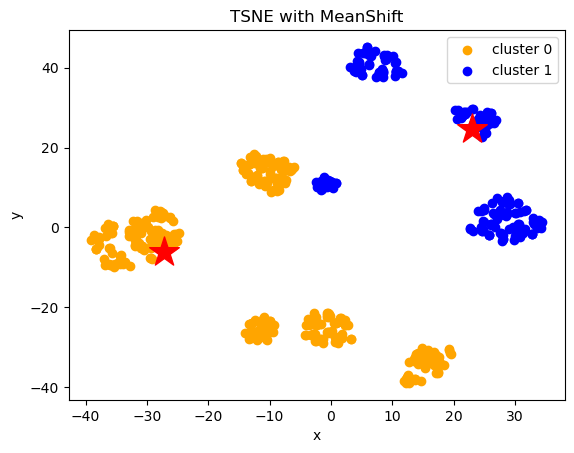

In [72]:
tsne = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(tsne[:-num_cluster, :], mean_shift.labels_, tsne[-num_cluster:,:], "TSNE with MeanShift")

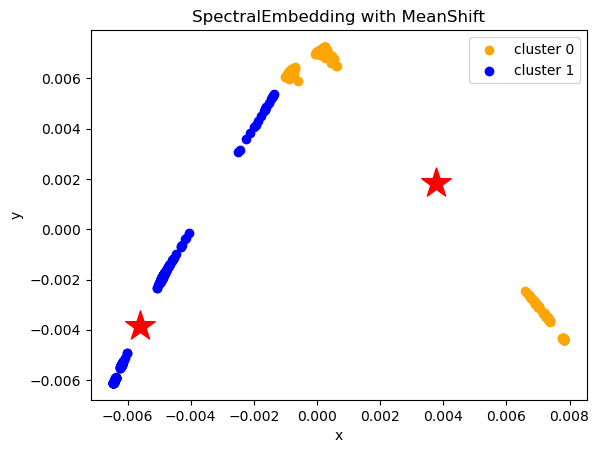

In [74]:
from sklearn.manifold import SpectralEmbedding

spectral_embedded = SpectralEmbedding().fit_transform(data_and_centers)
clustering_scatterplot(spectral_embedded[:-num_cluster, :], mean_shift.labels_, spectral_embedded[-num_cluster:,:], "SpectralEmbedding with MeanShift")